# Credit EDA Assignment

> PROBLEM STATEMENT: Get a brief understanding of how a bank operates when it comes to giving out credit.
 Understand the parameters used while making a decision for Approving or Rejecting a loan application. 

## 1. Importing libraries to be used for the analysis and reading the Data Frame

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns', 150) # to display all the columns
pd.set_option('display.max_rows', 150) # to display all the rows
pd.set_option('display.width', 500)

In [2]:
app = pd.read_csv('application_data.csv')
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. GOING THROUGH THE DATA
### 2.1  Performing necessary checks and getting familiar with the data

In [3]:
app.shape

(307511, 122)

In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 2.2  CHECKING NULL VALUES PRESENT IN THE DATA

In [5]:
null= app.isnull().sum()/len(app)*100
null.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [6]:
# we will define a function to remove all columns having null values more than 40%
def bins (df, perc=40):
    null= app.isnull().sum()/len(app)*100
    null = list(null[null.values>=perc].index)
    df.drop(labels= null, axis=1, inplace=True)
    return df

In [7]:
app = bins(app,perc=40)
app.shape

(307511, 73)

In [8]:
(app.isnull().mean()*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

### 2.3  Select columns for possible imputation

In [9]:
# selecting column with upto 30% mull values
app.columns[(app.isnull().mean()<=0.30) & (app.isnull().mean()>0)]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

## 3. Imputing columns with null values present 

In [10]:
app.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

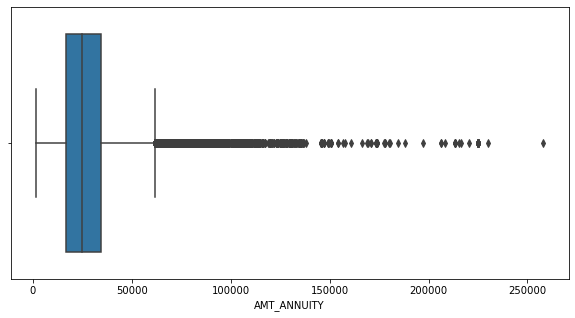

In [11]:
plt.figure(figsize=[10,5])
sns.boxplot(app.AMT_ANNUITY)
plt.show()

In [12]:
#since there are a lot of outliers present we can impute this column with median
app.AMT_ANNUITY.median()

24903.0

In [13]:
app['AMT_ANNUITY'] = app['AMT_ANNUITY'].fillna(app['AMT_ANNUITY'].median())

#### A general rule of thumb states that a column with outliers present in them should not be imputed with mean values as it will only pushout more outliers and disrupt the data. Hence, our approach here is simple, we impute such columns with the mean values which gives us more balanced data.

In [14]:
app['EXT_SOURCE_2'].value_counts()


0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

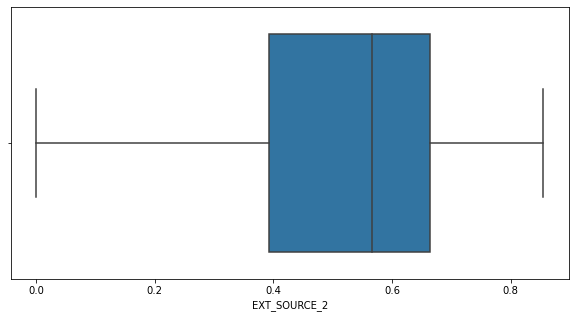

In [15]:
plt.figure(figsize = [10,5])
sns.boxplot(app.EXT_SOURCE_2)
plt.show()

In [16]:
# since there are no outliers present we can impute the null values using the mean
app['EXT_SOURCE_2']= app['EXT_SOURCE_2'].fillna(app['EXT_SOURCE_2'].mean())

#### Now here as we can see that there are no outliers present, we can use the mean values to impute the missing values in the data.

                           DROPPING SOME COLUMNS AS MAJORITY ENTRIES ARE 0

In [17]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [18]:
# upon checking it was found that the mean of these columns were 0 or close to 0 so to speak
# further analysis reveals that their mode is 0 i.e. maximum entries present in these columns are 0 so it is okay to drop them
print(app.AMT_REQ_CREDIT_BUREAU_YEAR.mode())
print(app.AMT_REQ_CREDIT_BUREAU_QRT.mode())
print(app.AMT_REQ_CREDIT_BUREAU_MON.mode())
print(app.AMT_REQ_CREDIT_BUREAU_WEEK.mode())
print(app.AMT_REQ_CREDIT_BUREAU_DAY.mode())
print(app.AMT_REQ_CREDIT_BUREAU_HOUR.mode())
print(app.OBS_30_CNT_SOCIAL_CIRCLE.mode())
print(app.OBS_60_CNT_SOCIAL_CIRCLE.mode())
print(app.DEF_30_CNT_SOCIAL_CIRCLE.mode())
print(app.DEF_60_CNT_SOCIAL_CIRCLE.mode())


0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


In [19]:
# dropping the columns
columns_to_drop=['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
app.drop(labels=columns_to_drop, axis=1, inplace = True)

In [20]:
app.shape

(307511, 63)

In [21]:
(app.isnull().mean()*100).sort_values(ascending=False).head(7)

OCCUPATION_TYPE           31.345545
EXT_SOURCE_3              19.825307
NAME_TYPE_SUITE            0.420148
AMT_GOODS_PRICE            0.090403
CNT_FAM_MEMBERS            0.000650
DAYS_LAST_PHONE_CHANGE     0.000325
SK_ID_CURR                 0.000000
dtype: float64

### 3.1 Occupation_Type_Imputation

In [22]:
app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
app.OCCUPATION_TYPE.isnull().sum()

96391

            Here in the occupation column there are close to 1lakh values that are empty.
    since it is a categorical column we can impute it with the mode value i.e. laborers but we simply cannot do that as we do not know if the person really is labour or not, so we can do is we can create another category 'others' and impute the column with it.

In [24]:
app['OCCUPATION_TYPE']= app['OCCUPATION_TYPE'].fillna("OTHER")

In [25]:
app.OCCUPATION_TYPE.value_counts()

OTHER                    96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

### 3.2 NAME_TYPE_SUITE imputation

In [26]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [27]:
#here we can impute the column with the mode as we are familiar with the fact that it is not uncommon for people to visit 
#the bank unaccompanied to ask for a loan
app.NAME_TYPE_SUITE= app.NAME_TYPE_SUITE.fillna(app.NAME_TYPE_SUITE.mode()[0])

In [28]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

### 3.3 CNT_FAM_MEMBERS imputation

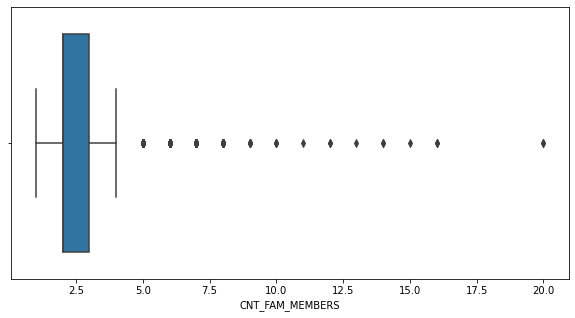

In [29]:
plt.figure(figsize=[10,5])
sns.boxplot(app.CNT_FAM_MEMBERS)
plt.show()

>I observed in the despciption of the data i ran earlier that there were max 20 members in familt count.
Althought such a phenomenon is not highly unlikely in INDIA as there is a joint family culture present, but due to the vast number of entries in the column begin at 1 and end upto 4 a number as high as 20 would surely be stated as an outlier.

In [30]:
#imputing with median
app.CNT_FAM_MEMBERS= app.CNT_FAM_MEMBERS.fillna(app.CNT_FAM_MEMBERS.median())

### 3.4 AMT_GOODS_PRICE imputation

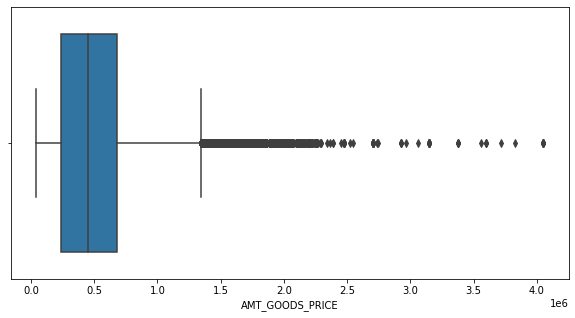

In [31]:
# AMT_GOODS_PRICE is a continuous variable. So checking for outliers
plt.figure(figsize=[10,5])
sns.boxplot(app.AMT_GOODS_PRICE)
plt.show()

>Now that we have the mean, we can see that it is quite high number as well sa the boxplot shows us that there are a number of outlier values present which could deviate our calculation if the mean is entered against the null values. hence we can go with a different approach by filling the na values with median of the column as the median will give a much more balanced value to the column rather than mean and take care of the outliers present.

In [32]:
# a lot of outliers thus imputing with median
app.AMT_GOODS_PRICE= app.AMT_GOODS_PRICE.fillna(app.AMT_GOODS_PRICE.median())

In [33]:
(app.isnull().mean()*100).sort_values(ascending=False).head()

EXT_SOURCE_3                  19.825307
DAYS_LAST_PHONE_CHANGE         0.000325
SK_ID_CURR                     0.000000
FLAG_DOCUMENT_6                0.000000
REG_REGION_NOT_WORK_REGION     0.000000
dtype: float64

### 3.5 EXT_SOURCE_3 Imputation

In [34]:
app.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

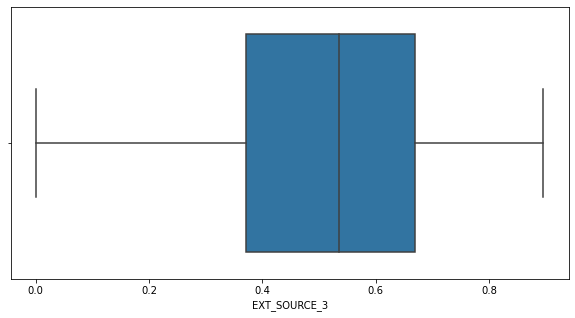

In [35]:
plt.figure(figsize=[10,5])
sns.boxplot(app.EXT_SOURCE_3)
plt.show()

In [36]:
app.EXT_SOURCE_3= app.EXT_SOURCE_3.fillna(app.EXT_SOURCE_3.mean())

# 4. Some analysis on numerical columns

In [37]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.174464,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.654672e-01,0.510853,-757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00

            There is a certain discrepancy present in all the columns starting with DAYS.
                            They have negative values present in them.

In [38]:
# Finding the columns
day_col = [d for d in app if d.startswith('DAYS')]
day_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [39]:
app[day_col]= abs(app[day_col])
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.174464,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.654672e-01,0.510853,757.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

## 4.1 Converting all the days column into respective years

In [40]:
app['AGE']= app['DAYS_BIRTH']//365
app['YEAR_EMP']= app['DAYS_EMPLOYED']//365
app['YEAR_REG']= app['DAYS_REGISTRATION']//365
app['YEAR_ID_PUBLISH']= app['DAYS_ID_PUBLISH']//365

## 4.2 Dropping other colums of no use to our analysis

In [41]:
del_col = [d for d in app if d.startswith('FLAG')]

del_col


['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [42]:
drop_set = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_WORK_PHONE']
app.drop(labels=drop_set, axis=1, inplace=True)

In [43]:
app.shape

(307511, 46)

In [44]:
# check progress
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,YEAR_EMP,YEAR_REG,YEAR_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,25,1,9.0,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,828.0,45,3,3.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,815.0,52,0,11.0,6
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,617.0,52,8,26.0,6
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,1106.0,54,8,11.0,9


In [45]:
# check for other discrepansies
app.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
OCCUPATION_T

In [46]:
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [47]:
app = app[app["CODE_GENDER"]!= 'XNA']
app["CODE_GENDER"].replace(["M","F"],["MALE","FEMALE"], inplace=True)
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,YEAR_EMP,YEAR_REG,YEAR_ID_PUBLISH
0,100002,1,Cash loans,MALE,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,25,1,9.0,5
1,100003,0,Cash loans,FEMALE,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,828.0,45,3,3.0,0
2,100004,0,Revolving loans,MALE,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,815.0,52,0,11.0,6
3,100006,0,Cash loans,FEMALE,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,617.0,52,8,26.0,6
4,100007,0,Cash loans,MALE,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,1106.0,54,8,11.0,9


# 5. The data is too big to handle collectively thus we can cluster the data using bins.

### 5.1 Binning the income

In [48]:
# Binning 'AMT_INCOME_TOTAL' by creating various ranges
app['INCOME_RANGE']= pd.qcut(app.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1],labels=['VL', 'LOW', "MED", 'HI', 'VH'])
app.INCOME_RANGE.head()

0    MED
1     HI
2     VL
3    LOW
4    LOW
Name: INCOME_RANGE, dtype: category
Categories (5, object): ['VL' < 'LOW' < 'MED' < 'HI' < 'VH']

### 5.2 Binning the age

In [49]:
app['AGE_GRP'] = pd.cut(app.AGE, bins=[18,25,35,60,100], labels=['Very_Young','Young', 'Mid_Age', 'Senior_Citizen'])
app.AGE_GRP.head()

0    Very_Young
1       Mid_Age
2       Mid_Age
3       Mid_Age
4       Mid_Age
Name: AGE_GRP, dtype: category
Categories (4, object): ['Very_Young' < 'Young' < 'Mid_Age' < 'Senior_Citizen']

# 6. Imbalance ratio in the dataset

In [50]:
app.TARGET.value_counts(normalize=True)*100

0    91.927013
1     8.072987
Name: TARGET, dtype: float64

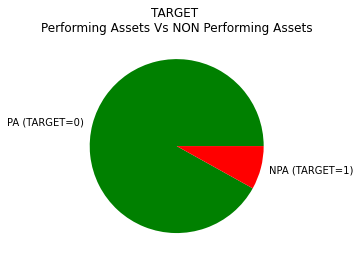

In [51]:
colors=['GREEN','RED']
plt.pie(app.TARGET.value_counts(normalize=True)*100,labels=['PA (TARGET=0)','NPA (TARGET=1)'], colors=colors)
plt.title('TARGET \nPerforming Assets Vs NON Performing Assets')
plt.show()

>There is a certain and significant data imbalance present. As we can see that 90% of the people who took loan did not default. Maybe their amounts were very low when compared to the defaulters but that seems highly unlikely.

    ~ NOW FOR FURTHER ANALYLIS WE WILL BE DIVIDING THE DATAFRAME INTO TWO SEPARATE DATAFRAMES ~
                                 1. DATAFRAME WITH TARGET VALUE 1
                                 2. DATAFRAME WITH TARGET VALUE 0

# 7. Splitting the dataframe into two separate dfs

In [52]:
ds0=app[app.TARGET==0]    #  data related to non-defaulters
ds1=app[app.TARGET==1]    #  data related to defaulters

## 7.1 Separating the categorical columns from numerical columns

In [53]:
#Categorical columns
list(set(ds0.columns) - set(ds0.describe().columns))

['FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'INCOME_RANGE',
 'AGE_GRP',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE',
 'NAME_CONTRACT_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE']

In [54]:
#Numerical columns
ds0.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AGE', 'YEAR_EMP', 'YEAR_REG', 'YEAR_ID_PUBLISH'],
      dtype='object')

# 8. Univariate analysis

In [55]:
# lets check out ratio of males to females who defaluted
ds1.CODE_GENDER.value_counts(normalize=True)*100

FEMALE    57.079557
MALE      42.920443
Name: CODE_GENDER, dtype: float64

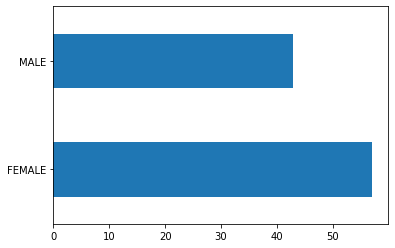

In [56]:
(ds1.CODE_GENDER.value_counts(normalize=True)*100).plot.barh()
plt.show()


    There are a greater number of females who defaluted


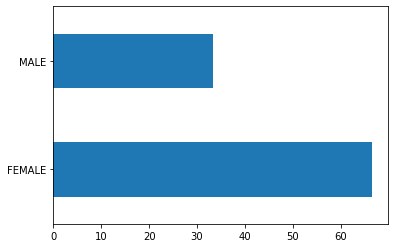

In [57]:
(ds0.CODE_GENDER.value_counts(normalize=True)*100).plot.barh()
plt.show()


> We can see that Female contribute to the non-defaulters as well as to the defaulters. We can conclude that
> <br> We see more female applying for loans than males and hence the more number of female defaulters as well. 
> <br> **But the rate of defaulting of FEMALE is much lower compared to their MALE counterparts.**

In [58]:
(ds0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100)

Secondary / secondary special    70.349368
Higher education                 25.064560
Incomplete higher                 3.326706
Lower secondary                   1.202411
Academic degree                   0.056954
Name: NAME_EDUCATION_TYPE, dtype: float64

In [59]:
(ds1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100)

Secondary / secondary special    78.646526
Higher education                 16.149043
Incomplete higher                 3.512588
Lower secondary                   1.679758
Academic degree                   0.012085
Name: NAME_EDUCATION_TYPE, dtype: float64

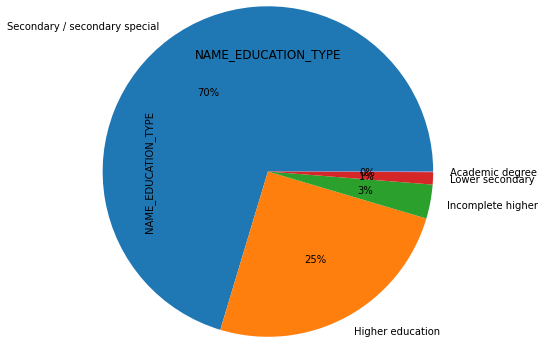

In [60]:
(ds0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.pie(radius=1.9,autopct='%1.f%%')
plt.title('NAME_EDUCATION_TYPE')
plt.show()

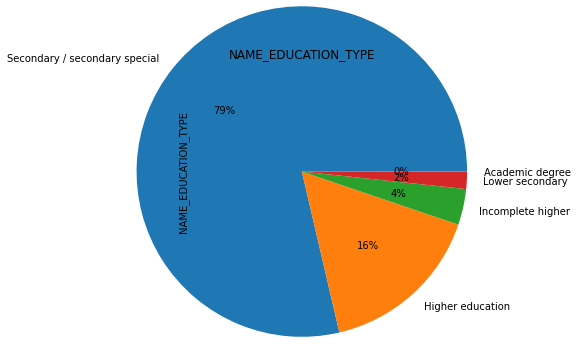

In [61]:
(ds1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.pie(radius=1.9, autopct='%1.f%%')
plt.title('NAME_EDUCATION_TYPE')
plt.show()

>A lot of defaluters and non defaulters from secondary education background. 
<br>This shows that a lot of people have availed loans who belong to secondary education background.

## 8.1 Defining a function for such analysis

In [62]:
# function to count plot for categorical variables
def subplots(col):
    plt.style.use('ggplot')
    sns.despine
    fig,(pa,npa) = plt.subplots(1,2,figsize=(20,5))
    
    sns.countplot(x=col, data=ds0,ax=pa)
    pa.set_ylabel('Total Counts')
    pa.set_title(f'Distribution of {col} for Non-Defaulters')
    pa.set_xticklabels(pa.get_xticklabels(), rotation=90)
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in pa.patches:
        pa.annotate('{:.1f}%'.format((p.get_height()/len(ds0))*100), (p.get_x(), p.get_height()))
        
    sns.countplot(x=col, data=ds1,ax=npa)
    npa.set_ylabel('Total Counts')
    npa.set_title(f'Distribution of {col} for Defaulters')    
    npa.set_xticklabels(npa.get_xticklabels(), rotation=90 )
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in npa.patches:
        npa.annotate('{:.1f}%'.format((p.get_height()/len(ds1))*100), (p.get_x(), p.get_height()))
    
    plt.show()

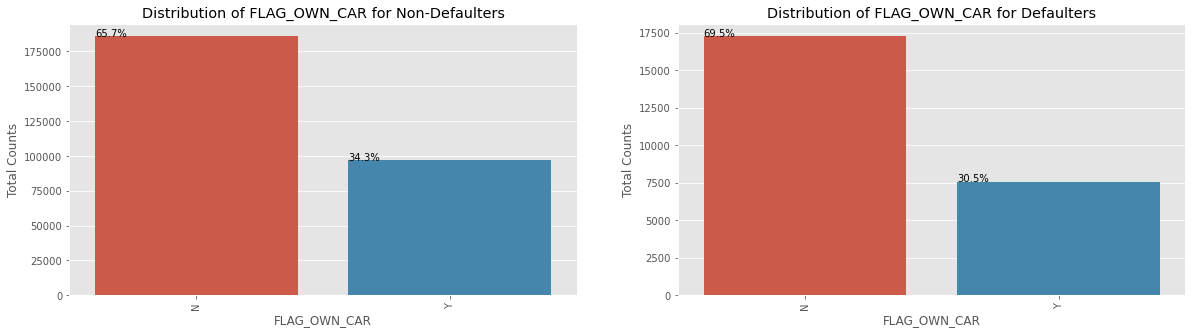

In [63]:
subplots('FLAG_OWN_CAR')

 >**There are simply more people without cars 
Looking at the percentages in both the charts, we can conclude that the rate of default of people having car is low compared to people who don't.**

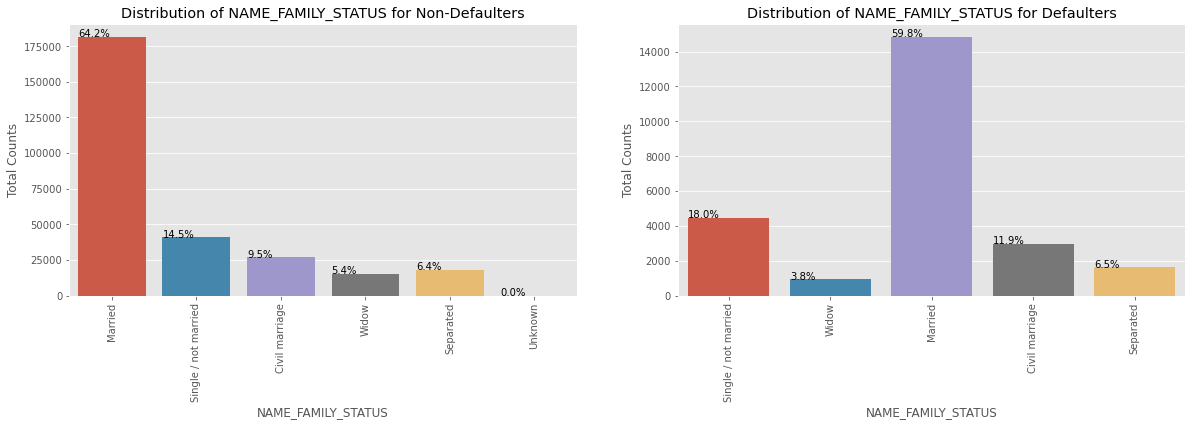

In [64]:
subplots('NAME_FAMILY_STATUS')


>**Married persons are in heavy numbers when it comes to applying for loans**
><br> It is also clearly visible that they are the one's to defalut most of the loans.
><br>whereas single people **{WIDOW, SEPARATED}**, are very less when it comes to defaulting the loans.

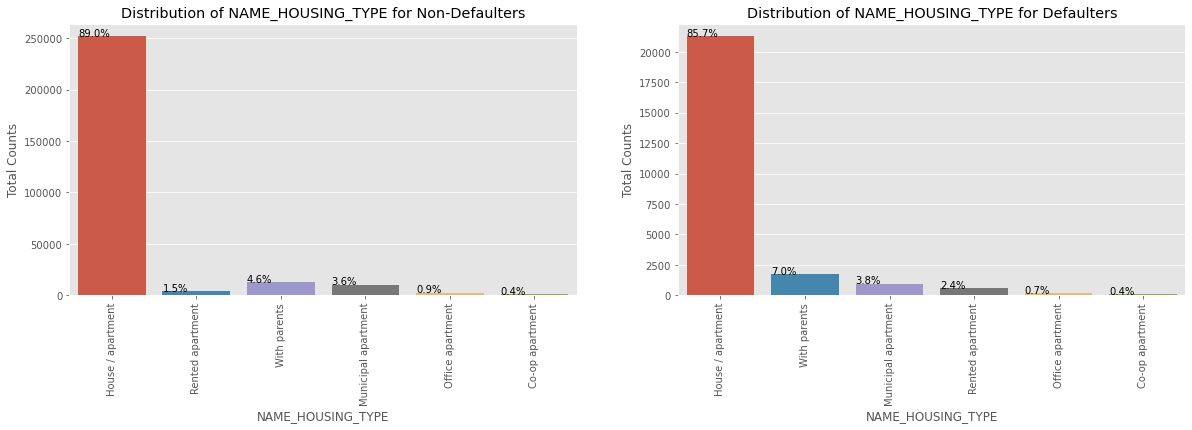

In [65]:
subplots('NAME_HOUSING_TYPE')

> People with houses/apartments have applied for loans.These loans are probably for their houses themselves 
><br>**{CONSTRUCTION, BUYING LAND, APARTMENT LOAN Etc.}**

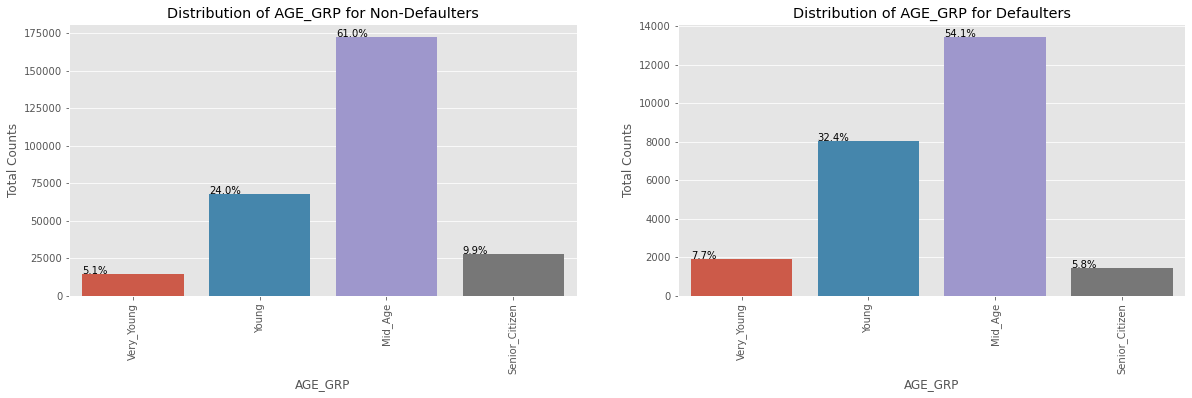

In [66]:
subplots('AGE_GRP')

                                    mid-age group tends to default more often

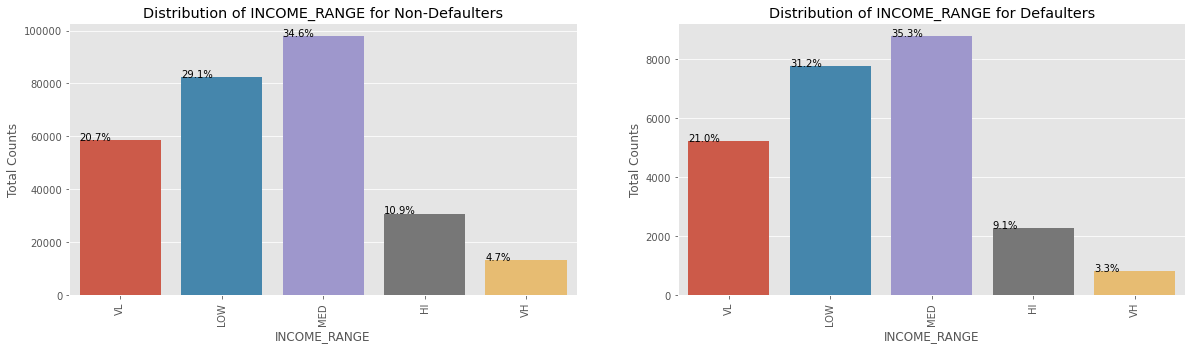

In [67]:
subplots('INCOME_RANGE')

## 8.2 For continuous variables

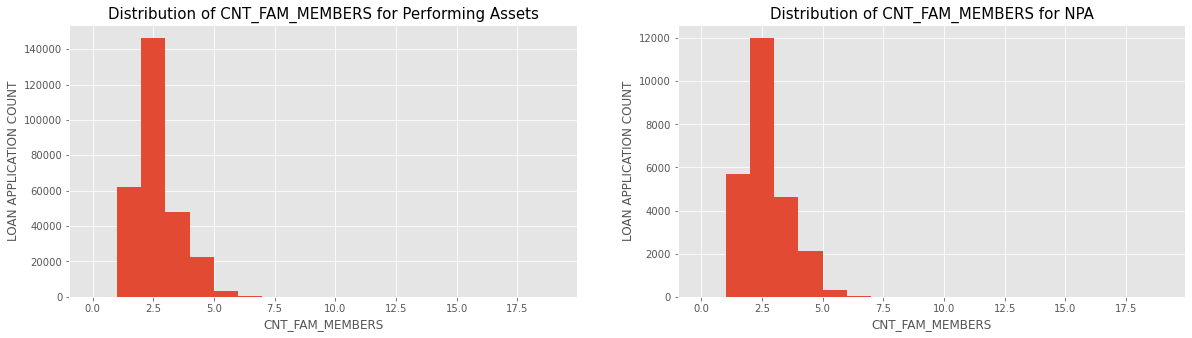

In [68]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
ds0['CNT_FAM_MEMBERS'].plot.hist(bins=range(20))
plt.title('Distribution of CNT_FAM_MEMBERS for Performing Assets',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
ds1['CNT_FAM_MEMBERS'].plot.hist(bins=range(20))
plt.title(f'Distribution of CNT_FAM_MEMBERS for NPA',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()

>**Most common familie are the families of 3 people.
><br>Generally a married couple and their child who apply most for the loan.**

# 9. Bivariate analysis

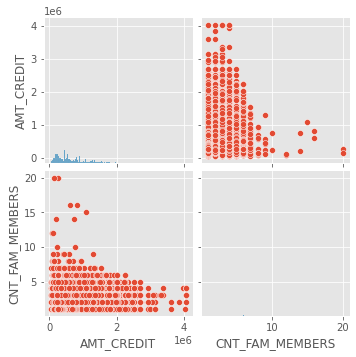

In [69]:
sns.pairplot(data=ds0, vars=['AMT_CREDIT','CNT_FAM_MEMBERS'])
plt.show()

    Families with lower members take high credit

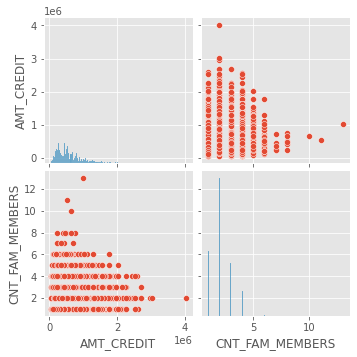

In [70]:
sns.pairplot(data=ds1, vars=['AMT_CREDIT','CNT_FAM_MEMBERS'])
plt.show()

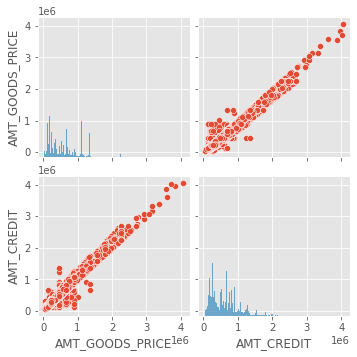

In [71]:
sns.pairplot(data=ds0, vars=['AMT_GOODS_PRICE','AMT_CREDIT'])
plt.show()

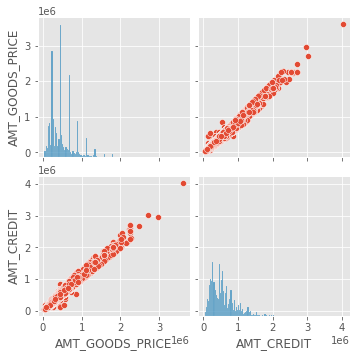

In [72]:
sns.pairplot(data=ds1, vars=['AMT_GOODS_PRICE','AMT_CREDIT'])
plt.show()

> **Higher the goods price higher the loan amount and it is same for both the data frames wherther the application <br>is from a default account or not.**

In [73]:
ds0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,YEAR_EMP,YEAR_REG,YEAR_ID_PUBLISH,INCOME_RANGE,AGE_GRP
1,100003,0,Cash loans,FEMALE,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,828.0,45,3,3.0,0,HI,Mid_Age
2,100004,0,Revolving loans,MALE,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,815.0,52,0,11.0,6,VL,Mid_Age
3,100006,0,Cash loans,FEMALE,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,617.0,52,8,26.0,6,LOW,Mid_Age
4,100007,0,Cash loans,MALE,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,1106.0,54,8,11.0,9,LOW,Mid_Age
5,100008,0,Cash loans,MALE,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,2536.0,46,4,13.0,1,VL,Mid_Age


In [74]:
credit = pd.pivot_table(data= ds0, index='NAME_INCOME_TYPE',columns='CODE_GENDER', values='AMT_CREDIT')
credit

CODE_GENDER,FEMALE,MALE
NAME_INCOME_TYPE,,
Businessman,1.125000e+06,1.272857e+06
Commercial associate,6.688436e+05,6.853044e+05
Maternity leave,5.625000e+05,7.650000e+05
Pensioner,5.351622e+05,5.715400e+05
State servant,6.651319e+05,6.953567e+05
Student,3.725563e+05,5.987528e+05
Unemployed,7.879091e+05,1.045500e+06
Working,5.778456e+05,5.871831e+05


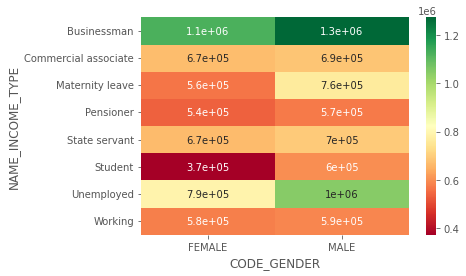

In [75]:
sns.heatmap(credit, annot=True, cmap='RdYlGn')
plt.show()

> Businessmen have the highest credit ratio for men as well as women

In [76]:
edu = pd.pivot_table(data= ds0, index='NAME_EDUCATION_TYPE',columns='CODE_GENDER', values='AMT_CREDIT')
edu

CODE_GENDER,FEMALE,MALE
NAME_EDUCATION_TYPE,,
Academic degree,708770.737113,735235.382812
Higher education,682490.801133,713144.543844
Incomplete higher,555343.188787,592586.904414
Lower secondary,476462.358369,513760.455069
Secondary / secondary special,567125.136108,587819.857027


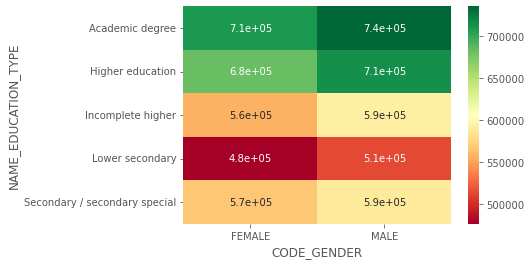

In [77]:
sns.heatmap(edu, annot=True, cmap='RdYlGn')
plt.show()

> MALES with academic degree take higher loans than their counterparts

In [78]:
status = pd.pivot_table(data= ds0, index='NAME_FAMILY_STATUS',columns='CODE_GENDER', values='AMT_CREDIT')
status

CODE_GENDER,FEMALE,MALE
NAME_FAMILY_STATUS,,
Civil marriage,547488.165650,540728.735090
Married,640345.207731,657608.940163
Separated,554200.544742,553957.774371
Single / not married,514897.177572,496202.852493
Unknown,585000.000000,675000.000000
Widow,487501.466992,509962.773072


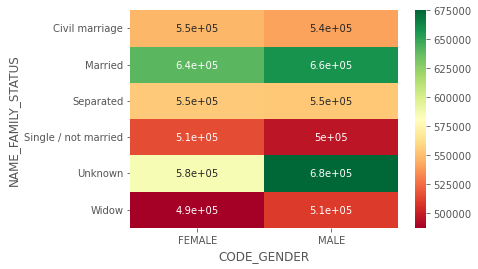

In [79]:
sns.heatmap(status, annot=True, cmap='RdYlGn')
plt.show()

> Married individuals take more loans and they default less as they have support from their significant other.

In [80]:
#Getting the top 10 correlation in ds0
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corr0=ds0.corr()
cord0 = corr0.where(np.triu(np.ones(corr0.shape),k=1).astype(np.bool)).unstack().reset_index()
cord0.columns=['Criteria_1','Criteria_2','Correlation']
cord0.dropna(subset=['Correlation'],inplace=True)
cord0['Abs_Correlation']=cord0['Correlation'].abs()
cord0 = cord0.sort_values(by=['Abs_Correlation'], ascending=False)
cord0.head(10)



,Criteria_1,Criteria_2,Correlation,Abs_Correlation
1063,YEAR_EMP,DAYS_EMPLOYED,1.000000,1.000000
451,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999756,0.999756
1067,YEAR_EMP,FLAG_EMP_PHONE,-0.999756,0.999756
1028,AGE,DAYS_BIRTH,0.999711,0.999711
1098,YEAR_REG,DAYS_REGISTRATION,0.999554,0.999554
1133,YEAR_ID_PUBLISH,DAYS_ID_PUBLISH,0.997518,0.997518
208,AMT_GOODS_PRICE,AMT_CREDIT,0.987024,0.987024
664,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950148,0.950148
580,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878569,0.878569
804,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861,0.861861


In [81]:
corr0.shape

(34, 34)

In [82]:
#Getting the top 10 correlation in ds1
corr1=ds1.corr()
cord1 = corr1.where(np.triu(np.ones(corr1.shape),k=1).astype(np.bool)).unstack().reset_index()
cord1.columns=['Criteria_1','Criteria_2','Correlation']
cord1.dropna(subset=['Correlation'],inplace=True)
cord1['Abs_Correlation']=cord1['Correlation'].abs()
cord1 = cord1.sort_values(by=['Abs_Correlation'], ascending=False)
cord1.head(10)



,Criteria_1,Criteria_2,Correlation,Abs_Correlation
1063,YEAR_EMP,DAYS_EMPLOYED,1.000000,1.000000
451,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999705,0.999705
1067,YEAR_EMP,FLAG_EMP_PHONE,-0.999705,0.999705
1028,AGE,DAYS_BIRTH,0.999691,0.999691
1098,YEAR_REG,DAYS_REGISTRATION,0.999479,0.999479
1133,YEAR_ID_PUBLISH,DAYS_ID_PUBLISH,0.997531,0.997531
208,AMT_GOODS_PRICE,AMT_CREDIT,0.982783,0.982783
664,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637,0.956637
580,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
804,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885,0.847885


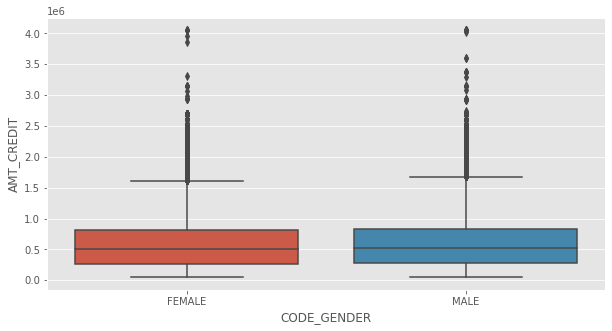

In [83]:
plt.figure(figsize=[10,5])
sns.boxplot(data=ds0, x='CODE_GENDER', y='AMT_CREDIT')
plt.show()

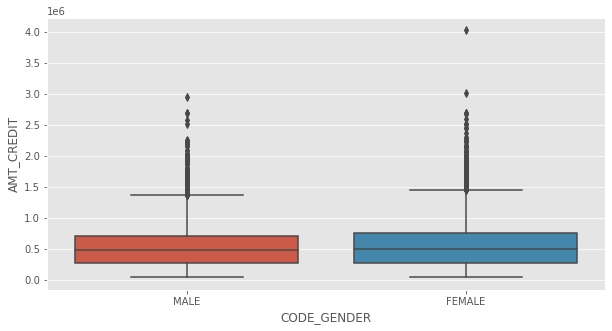

In [84]:
plt.figure(figsize=[10,5])
sns.boxplot(data=ds1, x='CODE_GENDER', y='AMT_CREDIT')
plt.show()

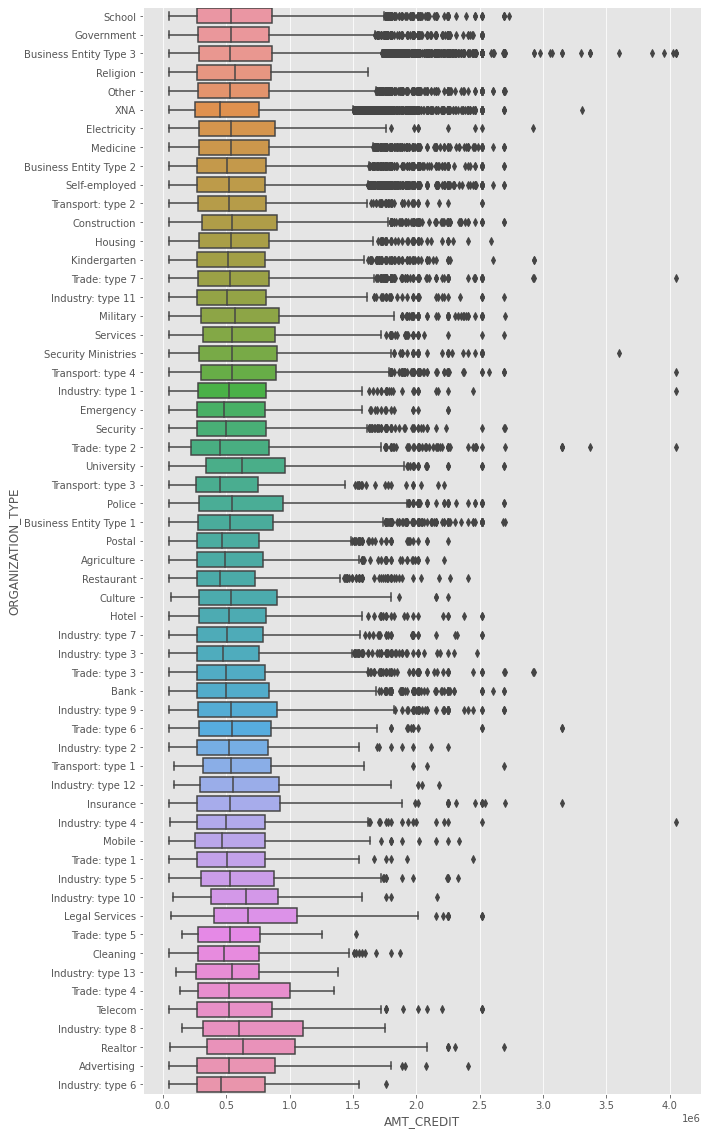

In [85]:
plt.figure(figsize=[10,20])
sns.boxplot(data=ds0, x='AMT_CREDIT', y='ORGANIZATION_TYPE')
plt.show()

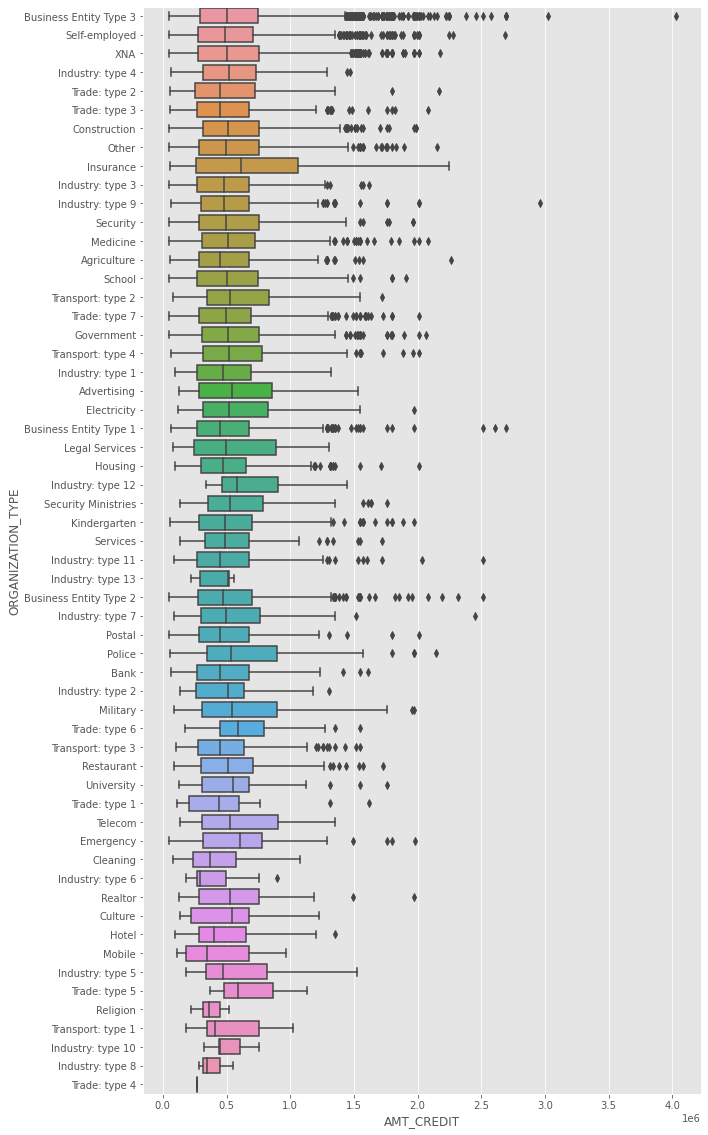

In [86]:
plt.figure(figsize=[10,20])
sns.boxplot(data=ds1, x='AMT_CREDIT', y='ORGANIZATION_TYPE')
plt.show()

> Business entity type3 has taken most amount of loans and has the most number of defaulters.
> <br> Insurance sector has no outlier values when it comes to credit repayment.

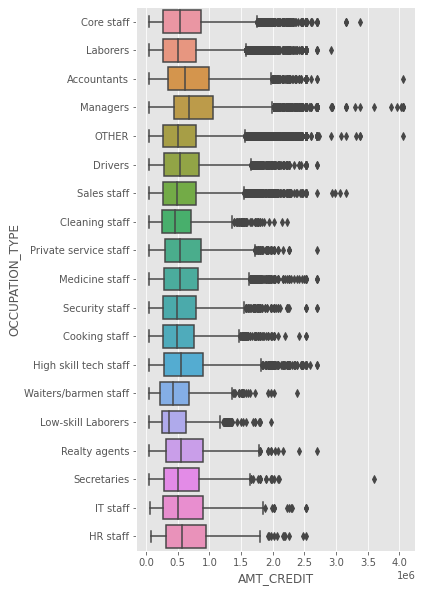

In [87]:
plt.figure(figsize=[5,10])
sns.boxplot(data=ds0, x='AMT_CREDIT', y='OCCUPATION_TYPE', orient='h')
plt.show()

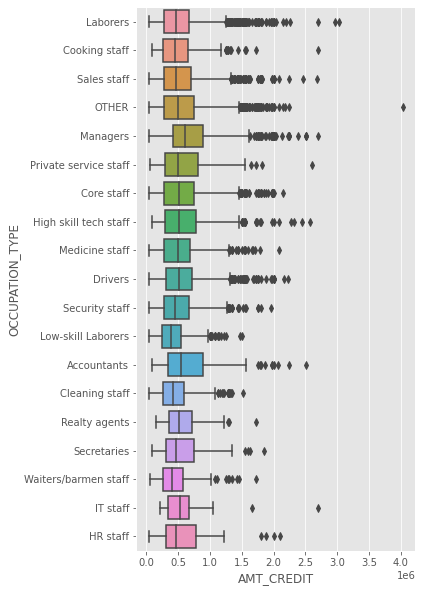

In [88]:
plt.figure(figsize=[5,10])
sns.boxplot(data=ds1, x='AMT_CREDIT', y='OCCUPATION_TYPE', orient='h')
plt.show()

    **Most applicants belong from the occupation of Managers**

# 10. Previous application analysis

In [89]:
papp = pd.read_csv('previous_application.csv')
papp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
papp.shape

(1670214, 37)

In [91]:
(papp.isnull().sum()/len(papp)*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [92]:
papp= papp.loc[:,papp.isnull().mean()<=0.5]
papp.shape

(1670214, 33)

In [93]:
papp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
# function to count plot for categorical variables
def uni_ana(col):

    plt.style.use('ggplot')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(15,5))
    
    sns.countplot(x=col, data=papp,ax=ax,hue='NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts')
    ax.set_title(f'Spread of {col}',fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    
    plt.show()

In [95]:
papp.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

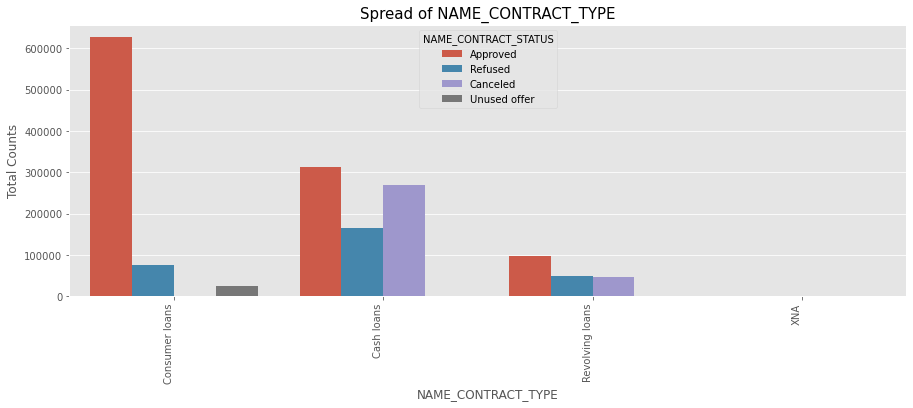

In [96]:
uni_ana('NAME_CONTRACT_TYPE')

>**Consumer and cash loans are the most prefferd ones although the approval ratings are a big low for cash loans.**

In [97]:
papp.NAME_CLIENT_TYPE.value_counts()

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

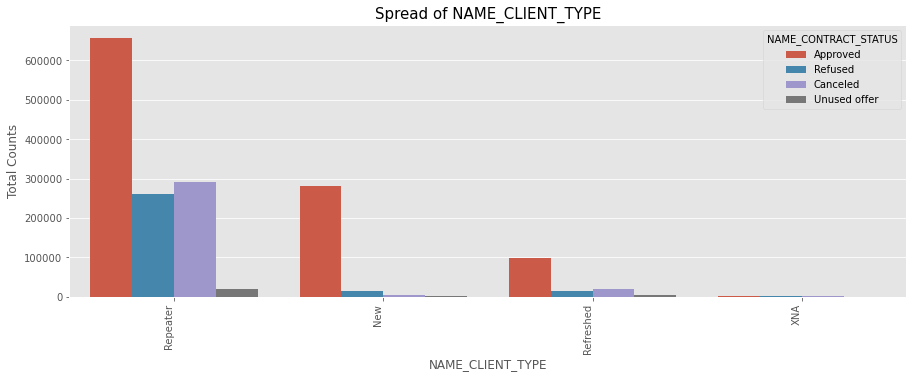

In [98]:
uni_ana('NAME_CLIENT_TYPE')

                            Repeaters are preffered more than any other client

In [99]:
papp.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

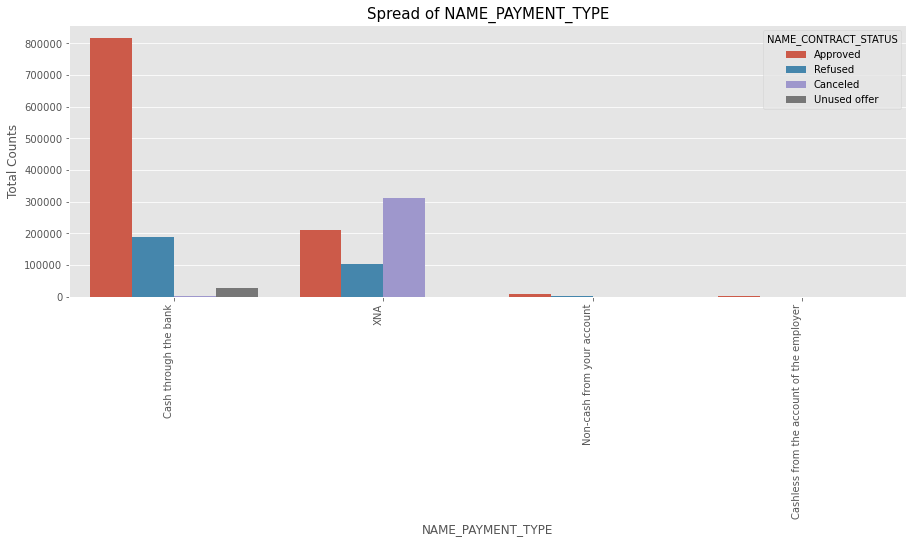

In [100]:
uni_ana('NAME_PAYMENT_TYPE')

>**Cash type of payments are highly approved and accepted.**

In [101]:
papp.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE                         8
SELLERPLACE_AREA                  2097
NAME_SELLER_INDUSTRY                11
CNT_PAYMENT                         49
NAME_YIELD_GROUP         

In [102]:
papp.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

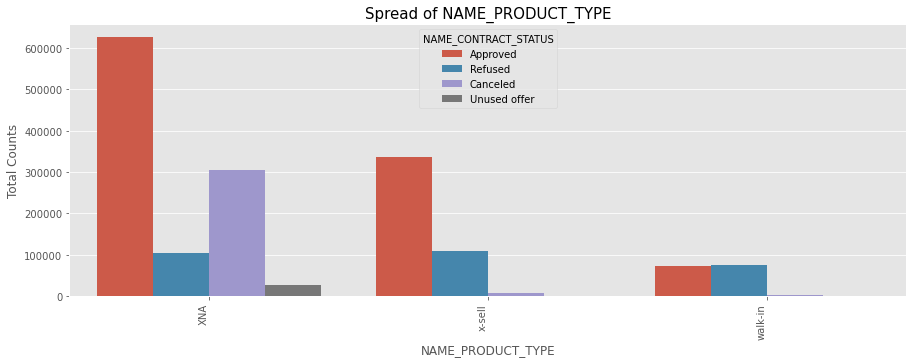

In [103]:
uni_ana('NAME_PRODUCT_TYPE')

In [104]:
papp.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

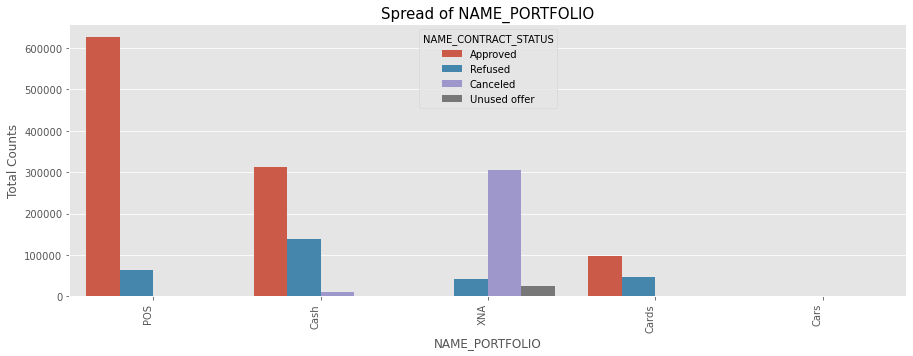

In [105]:
uni_ana('NAME_PORTFOLIO')

>>**Pos portfolios are highly approved**

In [106]:
#Getting the top 10 correlation PreviousApplication
corr=papp.corr().abs()
cordf = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
cordf.columns=['Column1','Column2','Correlation']
cordf.dropna(subset=['Correlation'],inplace=True)
cordf = cordf.sort_values(by=['Correlation'], ascending=False)
cordf.head(10)

,Column1,Column2,Correlation
88,AMT_GOODS_PRICE,AMT_APPLICATION,0.999884
89,AMT_GOODS_PRICE,AMT_CREDIT,0.993087
71,AMT_CREDIT,AMT_APPLICATION,0.975824
269,DAYS_TERMINATION,DAYS_LAST_DUE,0.927990
87,AMT_GOODS_PRICE,AMT_ANNUITY,0.820895
70,AMT_CREDIT,AMT_ANNUITY,0.816429
53,AMT_APPLICATION,AMT_ANNUITY,0.808872
232,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DRAWING,0.803494
173,CNT_PAYMENT,AMT_APPLICATION,0.680630
174,CNT_PAYMENT,AMT_CREDIT,0.674278


<Figure size 1440x576 with 0 Axes>

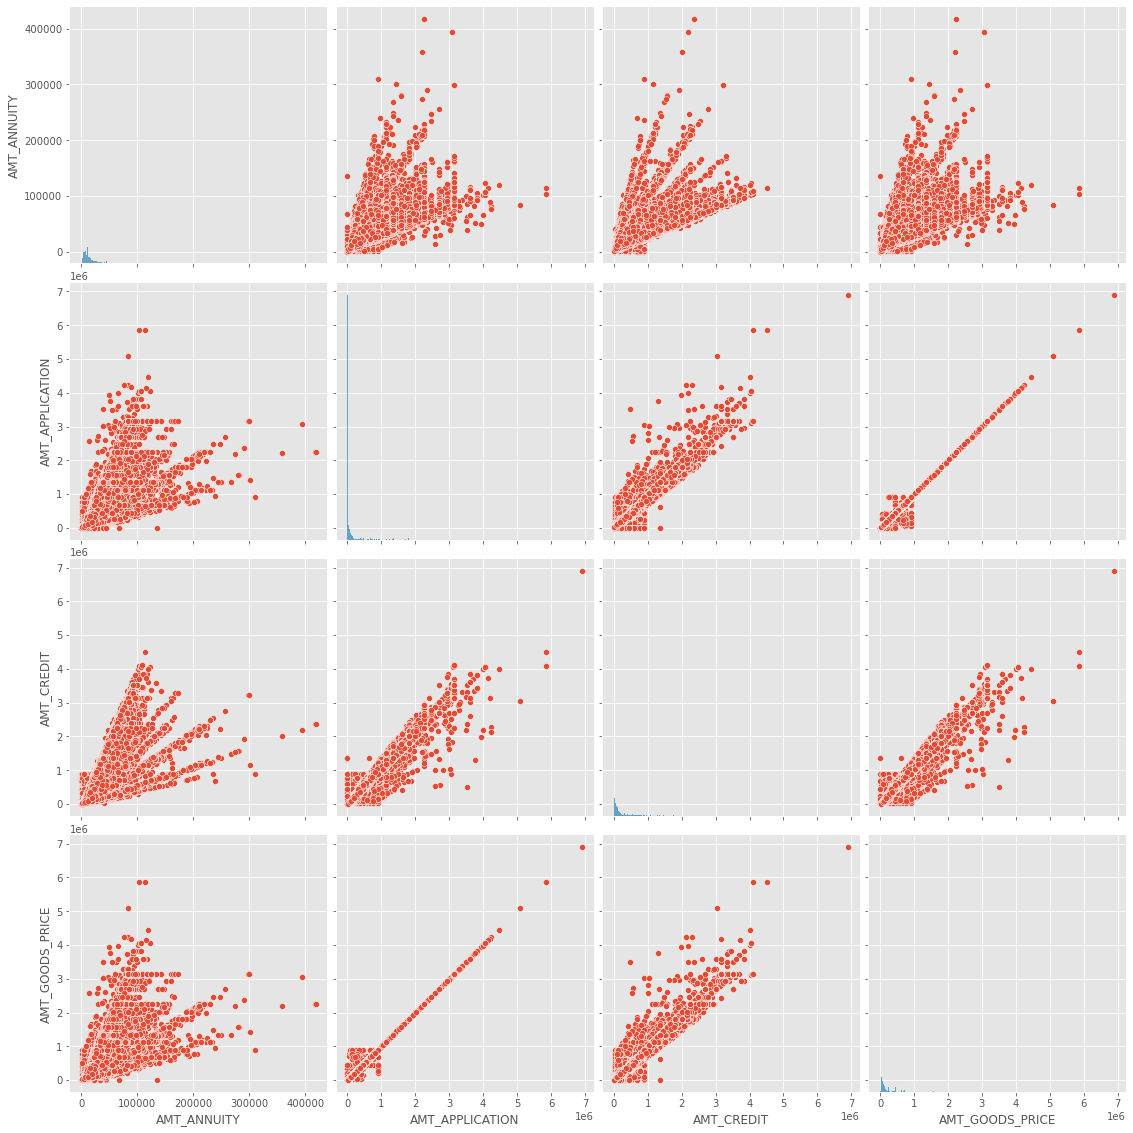

In [107]:
#plotting the relation between correlated highly corelated numeric vriables
plt.figure(figsize=[20,8])
sns.pairplot(papp[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','NAME_CONTRACT_STATUS']],size = 4)
plt.show()

# 11. Merging the files and examining the data

In [108]:
Target_Clientele = pd.merge(app,papp, how='inner', on=['SK_ID_CURR'])
Target_Clientele.shape

(1413646, 80)

In [109]:
Target_Clientele.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Data columns (total 80 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413646 non-null  int64   
 1   TARGET                        1413646 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413646 non-null  object  
 3   CODE_GENDER                   1413646 non-null  object  
 4   FLAG_OWN_CAR                  1413646 non-null  object  
 5   FLAG_OWN_REALTY               1413646 non-null  object  
 6   CNT_CHILDREN                  1413646 non-null  int64   
 7   AMT_INCOME_TOTAL              1413646 non-null  float64 
 8   AMT_CREDIT_x                  1413646 non-null  float64 
 9   AMT_ANNUITY_x                 1413646 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413646 non-null  float64 
 11  NAME_TYPE_SUITE_x             1413646 non-null  object  
 12  NAME_INCOME_TY

In [110]:
(Target_Clientele.isnull().mean()*100).sort_values(ascending=False)

NAME_TYPE_SUITE_y               49.139176
NFLAG_INSURED_ON_APPROVAL       39.689781
DAYS_TERMINATION                39.689781
DAYS_LAST_DUE                   39.689781
DAYS_LAST_DUE_1ST_VERSION       39.689781
DAYS_FIRST_DUE                  39.689781
DAYS_FIRST_DRAWING              39.689781
AMT_GOODS_PRICE_y               22.602264
AMT_ANNUITY_y                   21.731607
CNT_PAYMENT                     21.731254
PRODUCT_COMBINATION              0.022141
AMT_CREDIT_y                     0.000071
NAME_CONTRACT_TYPE_y             0.000000
WEEKDAY_APPR_PROCESS_START_y     0.000000
AMT_APPLICATION                  0.000000
YEAR_ID_PUBLISH                  0.000000
SK_ID_PREV                       0.000000
AGE_GRP                          0.000000
INCOME_RANGE                     0.000000
FLAG_LAST_APPL_PER_CONTRACT      0.000000
YEAR_REG                         0.000000
YEAR_EMP                         0.000000
AGE                              0.000000
HOUR_APPR_PROCESS_START_y        0

### TREATMENT OF NULL VALUES

In [111]:
Target_Clientele = Target_Clientele.loc[:,Target_Clientele.isnull().mean()<=0.35]
(Target_Clientele.isnull().mean()*100).sort_values(ascending=False)

AMT_GOODS_PRICE_y               22.602264
AMT_ANNUITY_y                   21.731607
CNT_PAYMENT                     21.731254
PRODUCT_COMBINATION              0.022141
AMT_CREDIT_y                     0.000071
EXT_SOURCE_3                     0.000000
DAYS_LAST_PHONE_CHANGE           0.000000
AGE                              0.000000
YEAR_EMP                         0.000000
YEAR_REG                         0.000000
WEEKDAY_APPR_PROCESS_START_y     0.000000
INCOME_RANGE                     0.000000
AGE_GRP                          0.000000
SK_ID_PREV                       0.000000
NAME_CONTRACT_TYPE_y             0.000000
EXT_SOURCE_2                     0.000000
AMT_APPLICATION                  0.000000
YEAR_ID_PUBLISH                  0.000000
HOUR_APPR_PROCESS_START_y        0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
NAME_GOODS_CATEGORY              0.000000
NAME_YIELD_GROUP                 0.000000
NAME_SELLER_INDUSTRY             0.000000
SELLERPLACE_AREA                 0

In [112]:
print(Target_Clientele.REG_REGION_NOT_LIVE_REGION.mode())
print(Target_Clientele.REG_REGION_NOT_WORK_REGION.mode())
print(Target_Clientele.LIVE_REGION_NOT_WORK_REGION.mode())
print(Target_Clientele.REG_CITY_NOT_LIVE_CITY.mode())
print(Target_Clientele.REG_CITY_NOT_WORK_CITY.mode())
print(Target_Clientele.LIVE_CITY_NOT_WORK_CITY.mode())

0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64
0    0
dtype: int64


In [113]:
drp =['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
Target_Clientele.drop(labels=drp,axis=1, inplace=True)

In [114]:
Target_Clientele.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AGE,YEAR_EMP,YEAR_REG,YEAR_ID_PUBLISH,INCOME_RANGE,AGE_GRP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,MALE,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.262949,0.139376,1134.0,25,1,9.0,5,MED,Very_Young,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,FEMALE,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,1,1,0,Core staff,2.0,1,1,MONDAY,11,School,0.622246,0.510853,828.0,45,3,3.0,0,HI,Mid_Age,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,FEMALE,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,1,1,0,Core staff,2.0,1,1,MONDAY,11,School,0.622246,0.510853,828.0,45,3,3.0,0,HI,Mid_Age,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,FEMALE,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,1,1,0,Core staff,2.0,1,1,MONDAY,11,School,0.622246,0.510853,828.0,45,3,3.0,0,HI,Mid_Age,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,MALE,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,Government,0.555912,0.729567,815.0,52,0,11.0,6,VL,Mid_Age,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [115]:
Target_Clientele[['ORGANIZATION_TYPE','INCOME_RANGE','AMT_CREDIT_x']]

,ORGANIZATION_TYPE,INCOME_RANGE,AMT_CREDIT_x
0,Business Entity Type 3,MED,406597.5
1,School,HI,1293502.5
2,School,HI,1293502.5
3,School,HI,1293502.5
4,Government,VL,135000.0
...,...,...,...
1413641,Business Entity Type 3,MED,675000.0
1413642,Business Entity Type 3,MED,675000.0
1413643,Business Entity Type 3,MED,675000.0
1413644,Business Entity Type 3,MED,675000.0


In [116]:
most_credit=Target_Clientele[['ORGANIZATION_TYPE','INCOME_RANGE','AMT_CREDIT_x']].sort_values(by='AMT_CREDIT_x',ascending=False)
most_credit

,ORGANIZATION_TYPE,INCOME_RANGE,AMT_CREDIT_x
612601,Trade: type 2,VH,4050000.0
67130,Business Entity Type 3,VH,3956274.0
547110,Business Entity Type 3,HI,3860019.0
1285249,Business Entity Type 3,MED,3375000.0
452579,Trade: type 6,VH,3150000.0
...,...,...,...
925173,XNA,MED,45000.0
1019128,Business Entity Type 2,LOW,45000.0
874409,Industry: type 3,VL,45000.0
1012448,XNA,VL,45000.0


In [117]:
most_credit.mode()

,ORGANIZATION_TYPE,INCOME_RANGE,AMT_CREDIT_x
0,Business Entity Type 3,MED,450000.0


In [118]:
org = pd.pivot_table(data= Target_Clientele, index='ORGANIZATION_TYPE',columns='INCOME_RANGE', values='AMT_CREDIT_x')
org

INCOME_RANGE,VL,LOW,MED,HI,VH
ORGANIZATION_TYPE,,,,,
Advertising,381730.071429,475116.968683,607750.019417,8.297154e+05,1.032075e+06
Agriculture,381883.213147,539439.235973,628567.470170,7.747005e+05,8.505404e+05
Bank,344569.656780,454598.303906,591878.086698,7.839675e+05,9.740040e+05
Business Entity Type 1,375839.520940,505625.171257,644409.347755,8.170337e+05,9.316238e+05
Business Entity Type 2,389346.130509,499790.987148,631646.978136,7.678704e+05,9.603372e+05
Business Entity Type 3,383754.234579,491526.675336,627897.741276,7.974369e+05,9.118054e+05
Cleaning,388059.343173,408691.307592,597345.306950,7.561559e+05,1.193361e+06
Construction,389169.100796,478092.873276,622400.834515,7.656941e+05,9.494241e+05
Culture,418273.577320,582953.108451,663509.903226,8.505702e+05,1.275531e+06


In [119]:
maxim= org.head(6)

In [120]:
maxim

INCOME_RANGE,VL,LOW,MED,HI,VH
ORGANIZATION_TYPE,,,,,
Advertising,381730.071429,475116.968683,607750.019417,829715.442238,1.032075e+06
Agriculture,381883.213147,539439.235973,628567.470170,774700.520761,8.505404e+05
Bank,344569.656780,454598.303906,591878.086698,783967.476684,9.740040e+05
Business Entity Type 1,375839.520940,505625.171257,644409.347755,817033.650783,9.316238e+05
Business Entity Type 2,389346.130509,499790.987148,631646.978136,767870.379394,9.603372e+05
Business Entity Type 3,383754.234579,491526.675336,627897.741276,797436.865392,9.118054e+05


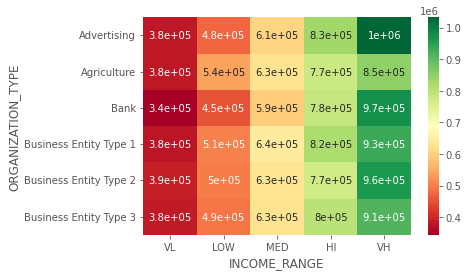

In [121]:
sns.heatmap(maxim, annot=True, cmap='RdYlGn')
plt.show()

In [122]:
org = pd.pivot_table(data= Target_Clientele, index='ORGANIZATION_TYPE',columns='NAME_CONTRACT_TYPE_x', values='AMT_CREDIT_x')
org

NAME_CONTRACT_TYPE_x,Cash loans,Revolving loans
ORGANIZATION_TYPE,,
Advertising,654479.205224,346939.655172
Agriculture,569110.468627,259684.385382
Bank,604425.605329,308486.281930
Business Entity Type 1,639532.805451,329733.242134
Business Entity Type 2,613853.665554,308110.485995
Business Entity Type 3,632606.559953,324559.472257
Cleaning,543578.166093,292500.000000
Construction,643975.602295,341491.615181
Culture,686278.696129,255654.362416


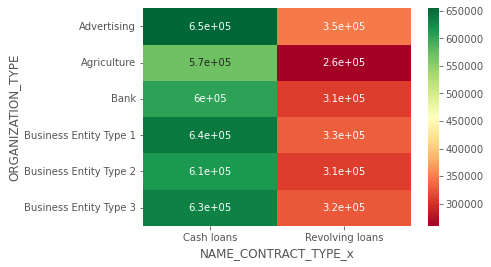

In [123]:
sns.heatmap(org.head(6), annot=True, cmap='RdYlGn')
plt.show()

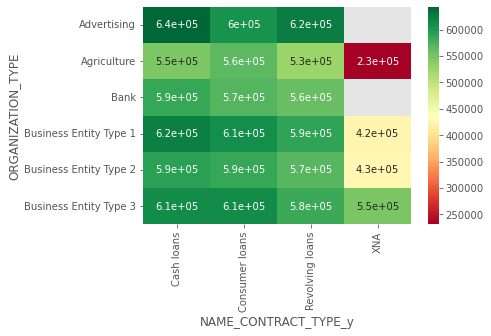

In [124]:
org = pd.pivot_table(data= Target_Clientele, index='ORGANIZATION_TYPE',columns='NAME_CONTRACT_TYPE_y', values='AMT_CREDIT_x')
sns.heatmap(org.head(6), annot=True, cmap='RdYlGn')
plt.show()

#### Business entity type 3 has the maximum numer of loans applications and it takes moderate credit amount.
> They prefer cash loans rather than revolving loans.